# Logistic Regression
This notebook will demonstrate an application of Logistic Regression on the Bank_Personal_Loan_Modelling dataset, first without principle component analysis, then adding it in for comparison.

In [1]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice result formatting
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA

df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# Data cleaning

In [2]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    # encode categorical variables
    res_df['ZIP Code'] = le.fit_transform(res_df['ZIP Code'])
    res_df['Personal Loan'] = le.fit_transform(res_df['Personal Loan'])
    res_df['Securities Account'] = le.fit_transform(res_df['Securities Account'])
    res_df['CD Account'] = le.fit_transform(res_df['CD Account'])
    res_df['Online'] = le.fit_transform(res_df['Online'])
    res_df['CreditCard'] = le.fit_transform(res_df['CreditCard'])
    res_df['Income'] = le.fit_transform(res_df['Income'])
    res_df['CCAvg'] = le.fit_transform(res_df['CCAvg'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df)

selecting features we want to use with logistic regression and standardize them.

In [6]:
#Selecting features
X = encoded_df.drop(['Personal Loan'],axis =1)
y = encoded_df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [7]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


# Split into Train and Test data
To apply logistic regression, the data must be split into "training" and "test" data.

In [11]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)
start = time.time()

#Instantiate the model
logreg = LogisticRegression()
#Fit the model with data
logreg.fit(X_train,y_train)

end = time.time()
logreg_time = end - start
print('Train Time (seconds) of Logistic Regression without PCA:',logreg_time)

y_pred_logreg = logreg.predict(X_test)

Train Time (seconds) of Logistic Regression without PCA: 0.018794775009155273


In [12]:
print("Accuracy:", accuracy_score(y_test,y_pred_logreg))

Accuracy: 0.9512


An accuracy of 0.9512 for logistic regression is relatively high, indicating that the model is able to classify the test data with a high degree of accuracy

Text(0.5, 427.9555555555555, 'Predicted label')

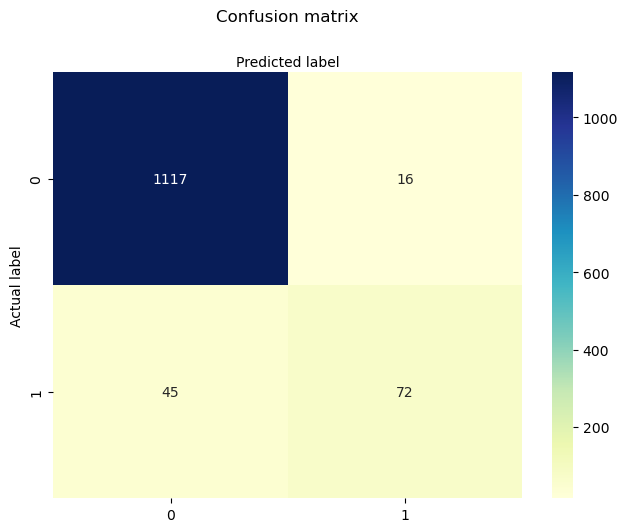

In [10]:
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_logreg)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
#Print a nicely formatted report
classify_logreg = classification_report(y_test, y_pred_logreg)
print("\nClassification Report")
print(classify_logreg)


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1133
           1       0.82      0.62      0.70       117

    accuracy                           0.95      1250
   macro avg       0.89      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250



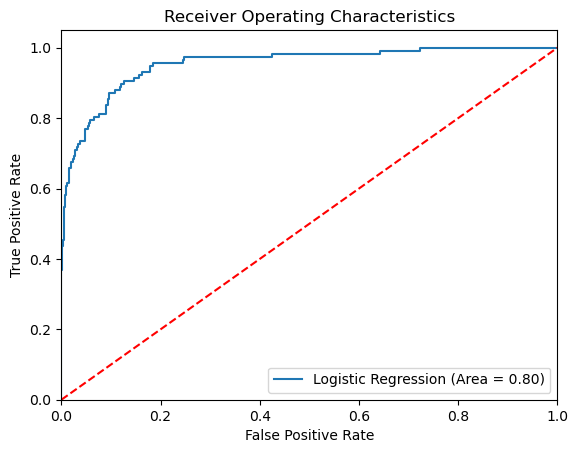

In [32]:
#Plot the ROC curve
logreg_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logreg_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

ROC curve is in the top-left corner, it indicates that the model has good predictive power and can distinguish between the positive and negative classes with high accuracy. This means that the model is performing well and has a high true positive rate and a low false positive rate. In other words, it is correctly identifying most of the positive cases while minimizing the number of false positives. This is a desirable result for a classification model, indicating that it can effectively differentiate between the classes.

# Implementing PCA

To retain 90 % of the variation, we needed 10 components
Train Time (seconds) of Logistic Regression with PCA: 0.005325794219970703
Accuracy: 0.936


Text(0.5, 427.9555555555555, 'Predicted label')

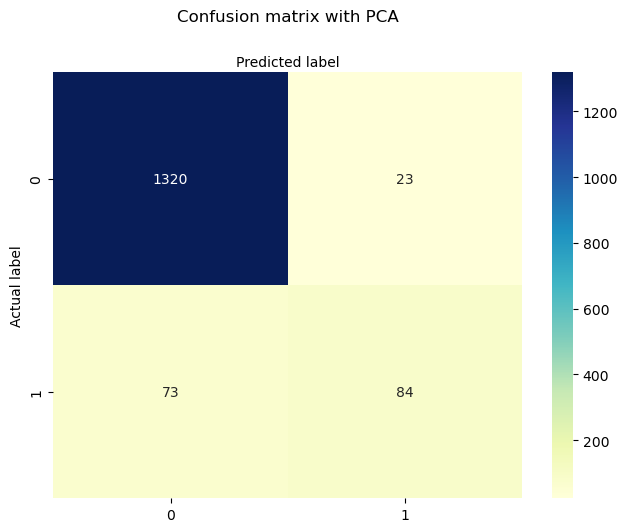

In [13]:

#Selecting features
X = encoded_df.drop(['Personal Loan'],axis =1)
y = encoded_df['Personal Loan']

#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n_components=n/100)

#Fit the PCA on the training set
pca.fit(X)

print('To retain', n, '% of the variation, we needed', pca.n_components_, 'components')

#Apply transformation to both Training and Test set
X_pca = pca.transform(X)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

#Logistic Regression with PCA
start = time.time()
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train,y_train)
end = time.time()
logreg_time_pca = end-start
print('Train Time (seconds) of Logistic Regression with PCA:',logreg_time_pca)

y_pred_logreg_pca = logreg_pca.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred_logreg_pca))

#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_logreg_pca)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix with PCA', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')




Classification Report with PCA
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       910
           1       0.51      0.26      0.34        90

    accuracy                           0.91      1000
   macro avg       0.72      0.62      0.65      1000
weighted avg       0.89      0.91      0.90      1000



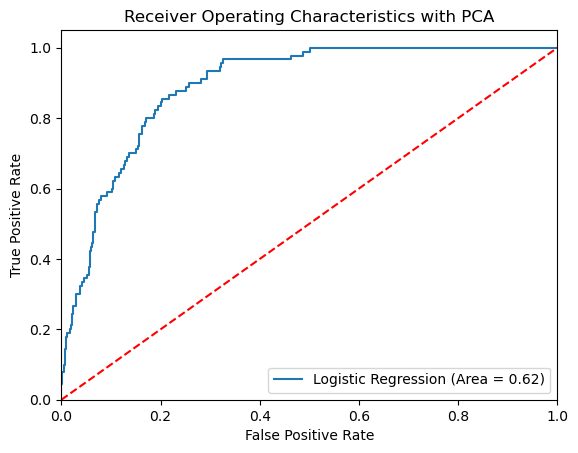

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a logistic regression model with PCA
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)
y_pred_logreg_pca = logreg_pca.predict(X_test_pca)

# Generate classification report
classify_logreg_pca = classification_report(y_test, y_pred_logreg_pca)
print("\nClassification Report with PCA")
print(classify_logreg_pca)

# Generate ROC curve
logreg_roc_auc_pca = roc_auc_score(y_test, y_pred_logreg_pca)
fpr, tpr, thresholds = roc_curve(y_test, logreg_pca.predict_proba(X_test_pca)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logreg_roc_auc_pca)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics with PCA')
plt.legend(loc="lower right")
plt.show()


PCA made logistic regression slightly less accurate, but it also ran slightly faster.